<a href="https://colab.research.google.com/github/prakaa/sola5050/blob/main/SOLA5050_NEM_Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

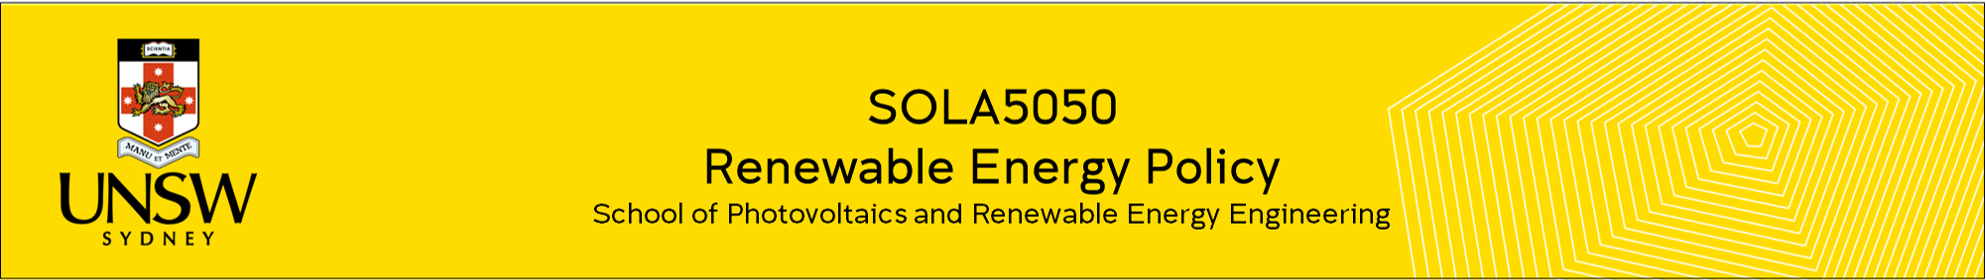

# National Electricity Market (NEM) Dispatch Simulator

## Introduction to Python, Notebooks and Colab

### Jupyter Notebooks and Google Colab

This page is a Jupyter Notebook. Jupyter Notebooks are 'coding' workbooks, where text, equations, code and results (e.g. tables and plots) can live in the same document. Jupyter Notebooks are often written in the Python programming language and can be run *locally* (i.e. on your computer) or on the cloud. This Jupyter Notebook is being run on the cloud using Google's Colab service.

### Python Coding
**You won't need to write any Python for this tutorial (unless you want to!**). That being said, it's a pretty handy skill for data analysis and modelling. There will also be an opportunity to analyse data for the Week 4 Tutorial in Python.

#### Resources for Python
* [Python Basics Notebook written by Jessie Copper](https://colab.research.google.com/drive/1vUe9gk74sqL0qoX7MFywr5HAh1EFjTUh)
*   [A Whirlwind Tour of Python](https://nbviewer.jupyter.org/github/jakevdp/WhirlwindTourOfPython/blob/master/Index.ipynb), an intro to the basics of Python and an introductory text for...
*   [Python Data Science Handbook](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb), a fantastic resource that will introduce you to handling and analysing data in Python. All of the chapters contain examples that can be run within Colab!

### Colab Features
Colab notebooks are a quick way to start coding, or to even learn how to code. It's worth pointing out some useful features of Colab/Jupyter Notebooks if you use them for this course or another.

#### Overview
[This notebook](https://colab.research.google.com/notebooks/basic_features_overview.ipynb) contains a brief rundown of Colab functionality.

#### Python (Code)
Colab gives you hints when writing code (autocompletion), and if you hover over a function or variable (in blue in a code cell), Colab gives you access to the documentation.

#### Text
Simply hover between cells to add a Text cell. The top of the Text cell will have options for writing text in [Markdown](https://guides.github.com/features/mastering-markdown/).


## Intro to the NEM and Dispatch

### What this notebook simulates
In this notebook, we will be simulating a week in a fictional electricity market. The default capacities cloesly resemble the NSW region of the Australian National Electricity Market (NEM), but with about 40% of its coal-fired generation to make the simulations a bit more interesting. Five large-scale generators (Utility PV, Wind, Coal, Gas and Hydro) actively participate in the market, but total energy demand is also met by rooftop/distributed PV.

The market operates in a similar manner to the NEM, with large-scale generators submitting bids that indicate how much they are willing to be paid for their energy. In our fictional market, the market operator solves an *economic dispatch* problem every 30 minutes (in the NEM, it's every 5 minutes) so that energy demand is met by the lowest-cost combination of bids. Should supply be insufficient to meet demand in this market, the price will jump to the market price cap of $15,000 per MW per hour.

### A brief explanation of dispatch and pricing
The processes for dispatch and settlement as run by the Australian Energy Market Operator (AEMO) are explained in the diagram below (Source: [AEMO (2010), An Introduction to Australia's National Electricity Market](https://www.abc.net.au/mediawatch/transcripts/1234_aemo2.pdf)). 

However, it is important to remember that the examples in the diagram below are simplified. While we won't be looking at the more nuanced and complex parts of dispatch and pricing as a part of this course (e.g. security constraints, marginal pricing, losses etc.) , you can check out these articles from WattClarity for more information if you're interested: [Beginner's Guide to Dispatch](https://wattclarity.com.au/articles/2018/08/beginners-guide-to-how-dispatch-works-in-the-nem-and-hence-how-prices-are-set/), [Intermediate Guide to Dispatch](https://wattclarity.com.au/articles/2019/02/a-preliminary-intermediate-guide-to-how-prices-are-set-in-the-nem/), [Price Setting Concepts](https://wattclarity.com.au/articles/2019/03/price-setting-concepts-an-explainer/)


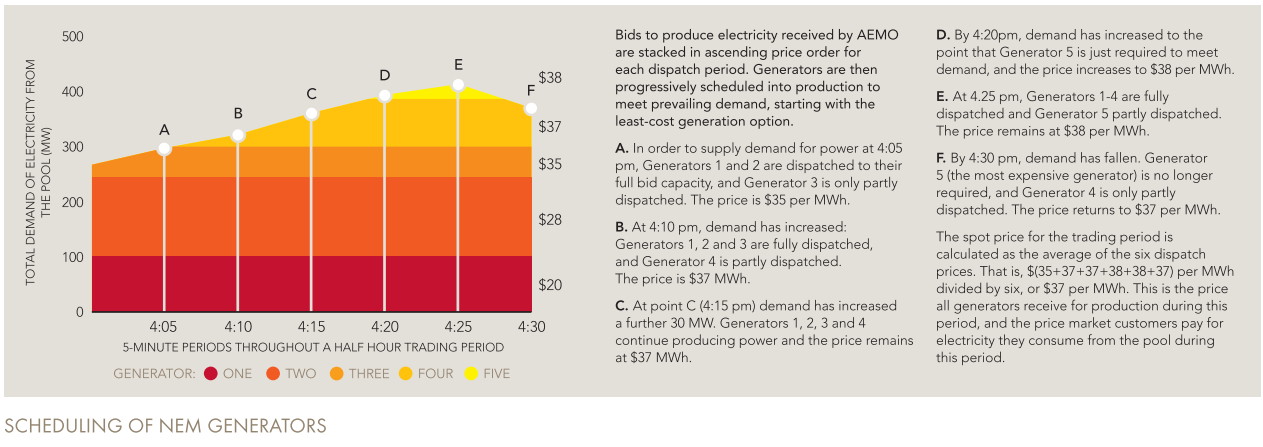

### How this market compares to the NEM
Like the NEM, this market is a *gross-pool* energy-only wholesale electricity market with a price floor (-\$1000 per MW per hr) and a price cap (\$15,000 per MW per hr). However, it's important to remember this is a simplification of the NSW region and of the NEM. Below are some of the key assumptions in this model. [This article](https://theconversation.com/baffled-by-baseload-dumbfounded-by-dispatchables-heres-a-glossary-of-the-energy-debate-84212) might help in explaining some of the terms used here.

**Market structure**
*   Single region market, with no import/export of energy (no *interconnection*).

*   This fictional market does not include the eight Frequency Control Ancillary Services (FCAS) services that are procured alongside energy.

**Intervals**
*   Dispatch is run every 30 minutes (rather than every 5).
*   Dispatch and trading prices are the same (the NEM is moving to 5 minute trading periods in 2021).

**Participant bidding and price setting**
*   Individual generators have been aggregated into larger generators distinguished by technology.
* Our simulated market does not model storage from battery energy storage systems or pumped hydro (we only model run-of-river hydro).
*   A bid is a single price offered for all of the available capacity of a generator across the week. In the NEM, generators can submit up to 10 price band bids up to the day before a dispatch interval, and can re-bid the volume of energy in each band up to minutes before the dispatch interval.
*   In this market, supply can be insufficient to meet demand, in which case the market price jumps to the market price cap. In the NEM, demand is more or less always serviced in the wholesale market. In times of scarce supply, higher price band bids may be dispatched, leading to market prices that can be as high as the market cap. If there are insufficient resources to meet demand in the NEM, AEMO can contract and activate emergency reserves.
*   The synchronous generation requirement may affect the price depending on how much it costs for a synchronous generator to increase its output. In the NEM, such a constraint could create a price that is actually determined by a combination of generators. This is a consequence of the NEM and other electricity markets using a *marginal pricing* approach, which can be thought of as the price reflecting the cost to supply the next MWh of energy. If you're interested, have a read of the articles from WattClarity that were linked in the previous cell.

**Physical constraints**
*   AEMO runs *security-constrained economic dispatch*. This means that power system security constraints are considered in the dispatch process, e.g. ensuring that transmission line flows are below line ratings. In this model, we do not consider any security constraints, barring one through the synchronous generation requirement. Security constraints, such as a hypothetical synchronous generation requirement, can affect prices.
*   AEMO's dispatch process also considers ramp rates. We do not consider feasible ramp rates in the model. 





### How to use this notebook

Notebooks consist of text cells (such as this one) or code cells. To make this notebook more compact and easier to read and use, some of the code cells have been modified to include text with some explanations. You'll need to 'run' all the code cells below.

#### Running code cells
For the notebook to work, you'll need to run the code cells. There are a couple of ways to do this:
1. Press the Play button that appears next to the top left hand corner of the code cell. You'll need to do this for all of the code cells in the notebook.
2. Press `Ctrl+Enter` to run a cell or `Shift+Enter` to run a cell and move to the next cell. You'll need to do this for all of the code cells in the notebook.
3. In the toolbar, click on 'Runtime' and then 'Run All' (`Ctrl+F9`). This will run all the code cells.

#### Running dispatch
1. Make sure you've run all the code cells before and including the 'Run economic dispatch' cell. Re-running the dispatch cell will restore the values to default values.
2. You should see text boxes and sliders to modify bids, capacity and a synchronous generation requirement. Modify these as required by the tutorial questions or as you see fit (though all options will have minimum and maximum values). 
3. Click `Run Dispatch`. It will take ~40 seconds to run economic dispatch for the week. This will produce an interactive chart with the dispatch results. 
4. Once you've run dispatch, you can run the code cells that plot the market price data and create a data download for you.

#### Viewing code
In this notebook, all of the code cells have a title and/or text. To view the code being run, double click on the whitespace (blank) area below the text but above the output window. This will reveal the code.



### Market Simulation

1.   **Run *all* cells below (many will have text but also have code that is hidden)**
2.   **Enter bids, capacities and synchronous generation requirement and then click 'Run Dispatch'**
3. **You can now run the subsequent cells to plot price data and/or download dispatch and price data from the simulation**

In [ ]:
#@title Package imports and installation
#@markdown In this notebook, we will be using a couple of Python *packages*.
#@markdown Packages contain useful chunks of code that make it easier to do
#@markdown certain things in Python. This includes providing common functions 
#@markdown and useful [*objects*](https://realpython.com/python3-object-oriented-programming/).
#@markdown In particular, we will be using the data analysis package *pandas*
#@markdown and the NEM simulation tool *nempy*.

#@markdown To import a package such a pandas, you can use:
#@markdown `import pandas`. To assign an alias, you can write `import pandas as pd`.
#@markdown You can also selectively import certain functions and classes
#@markdown by using `from`, e.g. `from pandas import read_csv`.

# data analysis package
import pandas as pd

# progress bar
from tqdm.notebook import tqdm

# package for executing economic dispatch
!pip install nempy plotly
from nempy import markets, time_sequential

# package for interactive inputs
import ipywidgets as widgets

# packages for plotting
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


     |████████████████████████████████| 103 kB 5.1 MB/s 
     |████████████████████████████████| 48.0 MB 1.8 MB/s 


In [ ]:
#@title Loading and Preparing Data
#@markdown This cell pulls data from a `.csv` file on GitHub. 
#@markdown The file `capacity_factor_and_demand.csv` contains demand and capacity 
#@markdown availability data (i.e. % of unit capacity available to generate) 
#@markdown for each 30 minute interval for a week across the end of 2020 and
#@markdown the beginning of 2021. We assume that all of the Coal, Gas and Hydro
#@markdown capacity is available to generate (not always the case, especially
#@markdown with ageing coal generators!). Solar PV and Wind availability are 
#@markdown based on real data from NSW.

#@markdown We load this data as a variable called `demand_cap_data`. Below, we
#@markdown call this variable in a code cell, which displays the data.

data_url = ('https://raw.githubusercontent.com/prakaa/sola5050/main/data/'
            + 'capacity_factor_and_demand.csv')
demand_cap_data = pd.read_csv(data_url,
                              dtype={'Coal': 'Float64', 'Gas': 'Float64',
                                     'Wind': 'Float64', 'Hydro': 'Float64',
                                     'PV (Utility)': 'Float64',
                                     'PV (Rooftop)': 'Float64',
                                     'Demand': 'Float64'},
                              parse_dates=['TimeEnd'])  

In [ ]:
demand_cap_data

In [ ]:
#@title Functions for executing dispatch and plotting
#@markdown This code block contains a couple of functions that execute economic
#@markdown dispatch. To simplify the process, we are using a package called
#@markdown [nempy](https://github.com/UNSW-CEEM/nempy),
#@markdown which is being developed by UNSW CEEM PhD candidate Nick
#@markdown Gorman. 

def execute_dispatch(volume, demand, price, info,
                     synch_constraint=None):
    '''
    Takes unit volume and price data, demand data and unit info
    and executes dispatch in a single-region (NSW) market for a single
    dispatch interval
    
    Args:
        volume (pandas DataFrame): Volume (MW) offer for each unit.
        demand (pandas DataFrame): Demand data in (MW).
        price (pandas DataFrame):  Price ($/MW) offer for each unit.
        info (pandas DataFrame): Names for units, which should all 
                                 be mapped to the NSW region.
        synch_constraint (list): List with [0]: constraint parameters and with
                                 [1]: LHS coefficients on unit basis
    Returns:
        nempy SpotMarket object with dispatch solved for the given 
        dispatch interval
    '''
    # create a SpotMarket object for NSW, with units as described in info
    market = markets.SpotMarket(unit_info=info, market_regions=['NSW'],
                                dispatch_interval=30)
    # assign volume to the SpotMarket object
    market.set_unit_volume_bids(volume)
    # assign price bids to the SpotMarket object
    market.set_unit_price_bids(price)
    # assign demand to the SpotMarket object
    # supply can be less demand, but at a shortfall cost of $15,000
    market.set_demand_constraints(demand)
    market.make_constraints_elastic('demand', violation_cost=15000.0)
    # apply synchronous generation constraint to market (rhs)
    # and link to units (lhs) if constraint provided
    if synch_constraint:
        market.set_generic_constraints(synch_constraint[0])
        market.link_units_to_generic_constraints(synch_constraint[1])
    # execute dispatch
    market.dispatch()
    return market


def set_up_synch_gen_constraint(current_row, synch_gen_req):
    '''
    Assembles synchronous generation constraint to pass to execute_dispatch.
    Constraint limits percentage of demand that VRE can serve.
    
    Args:
        current_row (pandas Series): Data for a given dispatch interval.
        synch_gen_req (float): 0-100%, defined by user input.
    Returns:
        List containing RHS and LHS definitions for synchronous generation
        constraint.
    '''
    # prepare synchronous generation constraint LHS and RHS
    renew_demand = (1 - synch_gen_req / 100) * current_row['Demand']
    renew_gen_param = pd.DataFrame({
        'set' : ['A'],
        'type': ['<='],
        'rhs': [renew_demand]
    })
    renew_gen_unit_coeffs = pd.DataFrame({
        'set': ['A', 'A', 'A'],
        'unit': ['PV (Utility)', 'PV (Rooftop)', 'Wind'],
        'service': ['energy', 'energy', 'energy'],
        'coefficient': [1.0, 1.0, 1.0]
    })
    constraints_synch_gen = [renew_gen_param, renew_gen_unit_coeffs]

    return constraints_synch_gen


def set_up_economic_dispatch(capacities, synch_gen_req, price_bids, unit_info,
                             row_data, outputs_dict):
    '''
    For a given dispatch interval, prepares data to be sent to execute_dispatch
    and maps returned SpotMarket object to dispatch interval time.
    
    Args:
        capacities (dict): Capacity of each of the units in MW, mapped to
                           unit name.
        synch_gen_req (float): Synchronous generation requirement (0-100%)
        price_bids (pandas DataFrame): Price ($/MW) offer for each unit.
        unit_info (pandas DataFrame): Names for units, which should all 
                                      be mapped to the NSW region.
        row_data (pandas Series): Row for a single dispatch interval with 
                                  capacity factor and demand data.
        outputs_dict (dict): Dictionary with previous dispatch interval times 
                             mapped to their corresponding solved SpotMarket
                             objects.
    Returns:
        result (dict): nempy SpotMarket object with solved dispatch, mapped to
                       dispatch interval.
    '''
    unit_names = ['PV (Utility)', 'PV (Rooftop)', 'Wind',
                  'Coal', 'Gas', 'Hydro']
    # prepare demand input data
    demand = pd.DataFrame({
        'region': ['NSW'],
        'demand': [row_data['Demand']]
    })
    # prepare volume input data based on capacity factors and total capacity
    volume_bids = pd.DataFrame({
        'unit': unit_names,
        '1': [row_data[unit] * capacities[unit] for unit in unit_names]
    })
    # prepare synchronous generation constraint
    if synch_gen_req > 0:
        synch_constraint = set_up_synch_gen_constraint(row_data, synch_gen_req)
        market = execute_dispatch(volume_bids, demand, price_bids, unit_info,
                                  synch_constraint)
    else:
        market = execute_dispatch(volume_bids, demand, price_bids, unit_info)
    # execute dispatch
    result = {row_data['TimeEnd']: market}

    return result


def wrangle_results_data(capacity_factor_demand_data, results):
    '''
    Wrangles all relevant data from dispatch into three pandas DataFrames:
    `demand`, `price` and `dispatch` which contain time series data for
    energy demand, the NSW market price and dispatched energy results, 
    respectively.
    
    Args:
        capacity_factor_demand_data (pandas DataFrame): Capacity factor and 
                                                        demand data.
        results (dict): Dictionary with all dispatch intervals datetimes as 
                        keys and corresponding SpotMarket objects as values.
    Returns:
        demand (pandas Series): Time series of demand data.
        price (pandas Series): Time series or NSW price data.
        dispatch (pandas DataFrame): Dispatched energy (MW) for each unit and
                                     dispatch interval.
    '''
    # extract all the dispatch intervals
    times = capacity_factor_demand_data['TimeEnd']
    # extract demand from imported data with datetime as index
    demand = capacity_factor_demand_data.set_index('TimeEnd')['Demand']
    
    # We can use object-specific functions called "methods" to extract 
    # results from economic dispatch - e.g. market.get_energy_prices() 
    # returns a DataFrame of energy prices.
    
    # extract price data from ED results
    # convert into a pandas Series
    price = pd.Series({time: results[time].get_energy_prices().loc[0, 'price'] 
                       for time in times}, name='price')
    # extract unit dispatch data from ED results
    # this data does not indicate which dispatch interval was solved.
    # to do this, we map each DataFrame to a time, then concatenate to 
    # form a single DataFrame 
    raw_dispatch = {time: results[time].get_unit_dispatch()
                    for time in times}
    for time in raw_dispatch.keys():
        raw_dispatch[time]['TimeEnd'] = time
    dispatch = pd.concat(raw_dispatch.values())
    
    return demand, price, dispatch


def plot_dispatch_and_demand(dispatch, demand):
    '''
    Creates an interactive area chart based on dispatch and demand data.
    
    Args:
        dispatch (pandas DataFrame): Dispatched MW for each unit, with a column
                                     called TimeEnd with datetimes.
        demand (pandas Series): Demand data in MW with datetimes in index.
        
    Returns:
        Plotly figure with stacked areas and demand line.
    '''
    # use Plotly Express to create an area chart, 
    # with colours distinguishing units
    fig = px.area(dispatch, x="TimeEnd", y="dispatch", color="unit",
                  labels=dict(dispatch="Dispatched Quantity (MW)",
                              TimeEnd="Date and Time"),
                  color_discrete_map={"Coal": "dimgrey", "Gas": "red",
                                      "Wind": "lightgreen", 
                                      "PV (Utility)": "gold",
                                      "PV (Rooftop)": "goldenrod",
                                      "Hydro": "deepskyblue"},
                  title='Dispatch Result for NSW Region')
    # add demand data to the same figure, and style as a dashed line
    demand_line = go.Scatter(x=demand.index, y=demand, name='Demand',
                             line={'dash': '2px', 'color': 'black'})
    fig.add_trace(demand_line)
    
    return fig


def economic_dispatch_by_interval(pv_utility_bid, wind_bid, gas_bid, coal_bid,
                                  hydro_bid, pv_utility_cap, pv_rooftop_cap, 
                                  wind_cap, gas_cap, coal_cap, hydro_cap,
                                  synch_gen_req, capacity_factor_demand_data):
    '''
    Wrapper function intended to take inputs from sliders/text boxes and execute
    economic dispatch. Solves ED for each interval and returns dispatch, price 
    and demand data.
    
    Args:
        *_bid (float): Bid ($/MW) for the given unit.
        *_cap (float): Unit nameplate capacity in MW.
        capacity_factor_demand_data (pandas DataFrame): Capacity factor and
                                                        demand data across 
                                                        dispatch intervals.
        synch_gen_req (float): Synchronous generation requirement (0-100%).
    Returns:
        demand (pandas Series): Time series of demand data.
        price (pandas Series): Time series or NSW price data.
        dispatch (pandas DataFrame): Dispatched energy (MW) for each unit and
                                     dispatch interval.
    '''
    # prepare price bid data
    # we treat rooftop PV as take-all by assigning a offer below market floor
    price_bids = pd.DataFrame({
        'unit': ['PV (Utility)', 'PV (Rooftop)', 'Wind',
                 'Gas', 'Coal', 'Hydro'],
        '1': [pv_utility_bid, -1001,  wind_bid, gas_bid, coal_bid, hydro_bid]
    })
    # prepare unit info data for units in the NSW region
    unit_info = pd.DataFrame({
        'unit': ['PV (Utility)', 'PV (Rooftop)', 'Wind',
                 'Gas', 'Coal', 'Hydro'],
        'region': ['NSW', 'NSW','NSW', 'NSW', 'NSW', 'NSW']
    })
    # prepare capacity data
    capacities = {
        'PV (Rooftop)': pv_rooftop_cap, 'Wind': wind_cap, 'Coal': coal_cap, 
        'Gas': gas_cap, 'PV (Utility)': pv_utility_cap, 'Hydro': hydro_cap
        }
    # This block of code iterates through rows of capacity factor, availability
    # and demand data to execute economic dispatch. The iteration is wrapped by 
    # `tqdm`, which displays a progress bar.
    outputs = {}
    for _, row in tqdm(capacity_factor_demand_data.iterrows(),
                       desc='Dispatch Calculation Progress',
                       total=len(capacity_factor_demand_data)):
        result = set_up_economic_dispatch(capacities, synch_gen_req, 
                                          price_bids, unit_info, row, outputs)
        outputs.update(result)
    
    # Results from dictionary processed by data wrangling and plotting fucntions.
    demand, price, dispatch = wrangle_results_data(capacity_factor_demand_data,
                                                   outputs)
    dispatch_fig = plot_dispatch_and_demand(dispatch, demand)
    dispatch_fig.show()
    return dispatch, price, demand

In [ ]:
#@title Marginal cost data
#@markdown This table contains short-run marginal cost (**SRMC**) and long-run
#@markdown marginal cost (**LRMC**) for some of the generators in **$/MWh**. 
#@markdown You can use this data as a starting point for selecting 
#@markdown energy bids for each unit. 

#@markdown Marginal costs for Hydro are more complex than fuel/operating costs,
#@markdown but we'll assume a default bid/SRMC of \$80/MWh for Hydro
#@markdown and a LRMC of \$100/MWh.

#@markdown Rooftop solar PV is treated as *take-all*, i.e. all generation from
#@markdown rooftop solar PV is sent out to the grid. However, rooftop PV **does
#@markdown not receive the wholesale market price** for its energy.

marginal_costs = pd.DataFrame([[3, 50], [12, 60], [20, 35], [100, 150],
                               [80, 100]],
                              index=['PV', 'Wind', 
                                     'Coal', 'Gas', 'Hydro'],
                              columns=['SRMC', 'LRMC'])
marginal_costs

,SRMC,LRMC
PV,3,50
Wind,12,60
Coal,20,35
Gas,100,150
Hydro,80,100


In [ ]:
#@title Run economic dispatch
style = {'description_width': 'initial'}
interactive_ed = widgets.interactive(
    economic_dispatch_by_interval,
    {'manual': True},
    pv_utility_cap = widgets.BoundedFloatText(value=1750, min=0, max=10000,
                                              description=('Utility PV Capacity'
                                                           + ' (MW)'), 
                                              style=style), 
    pv_rooftop_cap = widgets.BoundedFloatText(value=2800, min=0, max=10000,
                                              description=('Rooftop PV'
                                                           + ' Capacity (MW)'),
                                              style=style),
    wind_cap = widgets.BoundedFloatText(1500, min=0, max=10000, 
                                        description='Wind Capacity (MW)',
                                        style=style),
    gas_cap = widgets.BoundedFloatText(1600, min=0, max=10000,
                                       description='Gas Capacity (MW)',
                                       style=style),
    coal_cap = widgets.BoundedFloatText(4000, min=0, max=10500,
                                        description='Coal Capacity (MW)',
                                        style=style),
    hydro_cap = widgets.BoundedFloatText(2285, min=0, max=6000,
                                        description='Hydro Capacity (MW)',
                                        style=style),
    pv_utility_bid=widgets.BoundedFloatText(value=marginal_costs.loc['PV',
                                                                     'SRMC'],
                                            min=-1000, max=15000,
                                            description=('Utility PV Bid '
                                                         + '($/MW/hr)'),
                                            style=style),
    wind_bid=widgets.BoundedFloatText(value=marginal_costs.loc['Wind', 'SRMC'],
                                      min=-1000, max=15000, 
                                      description='Wind Bid ($/MW/hr)',
                                      style=style),
    gas_bid=widgets.BoundedFloatText(value=marginal_costs.loc['Gas', 'SRMC'],
                                     min=-1000, max=15000,
                                     description='Gas Bid ($/MW/hr)',
                                     style=style),
    coal_bid=widgets.BoundedFloatText(value=marginal_costs.loc['Coal', 'SRMC'],
                                      min=-1000, max=15000,
                                      description='Coal Bid ($/MW/hr)',
                                      style=style),
    hydro_bid=widgets.BoundedFloatText(value=80,
                                       min=-1000, max=15000,
                                       description='Hydro Bid ($/MW/hr)',
                                       style=style),
    synch_gen_req=widgets.FloatSlider(value=0, min=0, max=100,
                                      description=('Synch. Gen. '
                                                   + 'Requirement (%)'),
                                      style=style),
    capacity_factor_demand_data=widgets.fixed(demand_cap_data)
)
interactive_ed.children[-2].description = 'Run Dispatch'
display(interactive_ed)

interactive(children=(BoundedFloatText(value=3.0, description='Utility PV Bid ($/MW/hr)', max=15000.0, min=-10…

In [ ]:
#@title Regional Price
#@markdown The price for energy is set by the marginal generator. In times
#@markdown when supply is scarce, the regional energy price may reach the
#@markdown market price cap of $15,000 (FY 2020-21). In this example, the
#@markdown market price cap is reached when supply is insufficient to meet
#@markdown demand.


def plot_price(price):
  # plotting code below uses Plotly for interactive plotting
  ## creates a Plotly figure
  fig = go.Figure()
  ## adds price as a line plot to the figure
  price_line = go.Scatter(x=price.index, y=price, name='Price')
  fig.add_trace(price_line)
  ## add axes labels and title
  fig.update_layout(
      title="NSW Region Price (One Week)",
      xaxis_title="Date and Time",
      yaxis_title="$/MW/hr"
      )
  return fig

try:
  dispatch, price, demand = interactive_ed.result
  price_fig = plot_price(price)
  price_fig.show()
except TypeError:
  print('Run economic dispatch first before running this cell')

In [ ]:
#@title Download data in a `.csv`
#@markdown Run this cell if you want to download the results of the
#@markdown dispatch run.

# combines dispatched energy data, price data  and demand data into a 
# single DataFrame

from google.colab import files

try:
  dispatch, price, demand = interactive_ed.result  
  data = pd.concat([dispatch.set_index('TimeEnd'), price, demand], axis=1)
  data.to_csv('dispatch_data.csv')
  # downloads the csv
  files.download('dispatch_data.csv')
except TypeError:
  print('Run economic dispatch first before running this cell')

# Week 7 Tutorial: Electricity Markets and Renewable Energy Integration

### Tutorial questions

Use the model below to complete this tutorial. 

 **Remember to check units (e.g. bids, SRMC and LRMC are in \$ per MW per hour or $\frac{$}{MWh}$ but dispatch intervals are 30 minutes long)**. 

The scenarios for this tutorial are based on scenarios and model outputs from [AEMO's 2020 Integrated System Plan](https://aemo.com.au/-/media/files/major-publications/isp/2020/final-2020-integrated-system-plan.pdf?la=en) (see pages 31 & 32 for more info on scenarios). As we are modelling a single region, we will be modelling the Counterfactual Cases for each scenario, in which there are no further transmission developments beyond projects already committed.

**NSW in Central Counterfactual Scenario:**
* Leave coal, gas, wind and hydro as they are in the default settings. Change gas to 2600 MW, utility PV to 8200 MW and rooftop PV to 3900 MW.

**NSW in Step Change Counterfactual Scenario:**
* Leave coal as it is from the default. Change gas to 1700 MW, hydro to 4200 MW, utility PV to 8900 MW, wind to 4100 MW and rooftop PV to 8200 MW.

When calculating emissions, you can use the following emissions factors:
* 1 tonne CO2-e / MWh for coal generation
* 0.5 tonne CO2-e / MWh for gas generation


#### Group 1 - System security and the energy market.

*Useful references*

For your activity this week, you might find Sections 6 and 8 from [this AEMC Consultation Paper](https://www.aemc.gov.au/sites/default/files/2020-07/System%20services%20rule%20changes%20-%20Consultation%20paper%20%E2%80%93%20%202%20July%202020.pdf) and Sections 3.2 and 3.3 from [this AEMO reference paper](https://www.aemo.com.au/-/media/Files/Electricity/NEM/Security_and_Reliability/Power-system-requirements.pdf) handy.

##### In your presentation:

* *Briefly* explain the need for frequency control in the power system. 
* *Briefly* explain what system strength and inertia are and what sorts of resources (generators, loads, etc.) provide them? 
* Run the scenarios below. Walk the class through your calculations and answers from each of the steps and questions below. Provide charts as necessary.
* Explain how the potential need for system services (frequency control & inertia, system strength, etc,) might affect renewable energy (if they do not provide them).

##### Scenario Modelling
1.   Set the synchronous generation requirement to 0% and run the model with default settings (i.e. current NSW region)
2.   Set the synchronous generation requirement to 0% and model NSW in 2032 based on the ISP's Step Change Scenario.
    * Briefly summarise the differences in prices, revenues and emissions between Step 1 and 2. Remember to check units (dispatch intervals are 30 minutes but bids and prices are per hour).
3.   Then, change the synchronous generation requirement to 30%. 
    * What is the impact of adding the synchronous generation requirement on the market price?
    * What is the impact of the requirement on the revenues of each large-scale generator (are they revenue sufficient at all times)?
    * What happens to the renewable energy percentage (and hence emissions)?


#### Group 2 - Revenue sufficiency. 

*Useful references*

Here are some policies or projects that you might want to explore in the last section of your presentation:
*   [Reliability and Emergency Reserve Trader (RERT)](https://aemo.com.au/en/energy-systems/electricity/emergency-management/reliability-and-emergency-reserve-trader-rert)
*   [Snowy Hydro 2.0](https://www.climatecouncil.org.au/snowy-hydro/?atb=DSA01b&gclid=CjwKCAjw9MuCBhBUEiwAbDZ-7rGpl4drJ03ZtNCgliDJ-jAEWdNh2LpWh-nUTA1L7Zj4ETEom8QzxhoCU-cQAvD_BwE)
*   [NSW Electricity Infrastructure Roadmap](https://energy.nsw.gov.au/sites/default/files/2020-11/NSW%20Electricity%20Infrastructure%20Roadmap%20-%20Overview_1.pdf)
*   [VRET](https://www.energy.vic.gov.au/renewable-energy/victorias-renewable-energy-targets) & [QRET](https://www.epw.qld.gov.au/about/initiatives/renewable-energy-targets)

You may also find this Haas Energy Institute blog useful: https://energyathaas.wordpress.com/2017/04/03/missing-money/ 

In your presentation:
    
* Revisit and outline the concept of revenue sufficiency for generators. 
* Run the scenarios below. Walk the class through your calculations and answers from each of the steps and questions below. Provide charts that show revenue sufficiency for each generator type in each scenario, as well as the fraction of total demand met by renewables.
* Discuss potential solutions to the revenue sufficiency problem. 
* What are some of the policies that have been put in place that might help or hinder the revenue sufficiency problem in the NEM? Pick no more than 3 and provide details.

##### Scenario Modelling

1.   Set synchronous generation requirement to 0% and run the model with default settings.
    *   Are all large-scale generators revenue sufficient (ie. does revenue exceed long-run generation costs)? Remember to check units (dispatch intervals are 30 minutes but bids and prices are per hour).
    *   During which time periods are the generators earning most of their money? Which generators are active at these times?
    *   How much of the total demand is met by renewables? 
2.    Model NSW in 2032 based on the ISP's Central Scenario. 
    * Are all large-scale generators still revenue sufficient?
    * How much of the total demand is met by renewables?
3.   Now model NSW in 2032 based on the ISP's Step Change Scenario. 
    * Compare the results in this scenario to Scenario 2 in terms of revenue sufficiency and total demand met by renewables.
    * What happens to the market price as more renewable capacity is built? Are there any factors this model doesn't account for that would change the price profile?


#### Group 3 - Flexibility. 
In your presentation:

* Outline the concept of ramp rates, start-up and shutdown times, and minimum operating levels for a generator?
* How do PV, Wind, Coal, Hydro, OCGT and CCGT ramp rates differ? (see table below)?
* Run the scenarios below. Walk the class through your calculations and answers from each of the steps and questions below. Provide charts as necessary. Note that the simulation does not explicitly consider ramp rates (i.e. generators are assumed to be able to be ramped up and down instantly).
    * Is it likely that ramping capability will become more important as the penetrations of renewable energy increase?
    * What types of generation have minimum operating levels? Do you expect this will need to be managed?

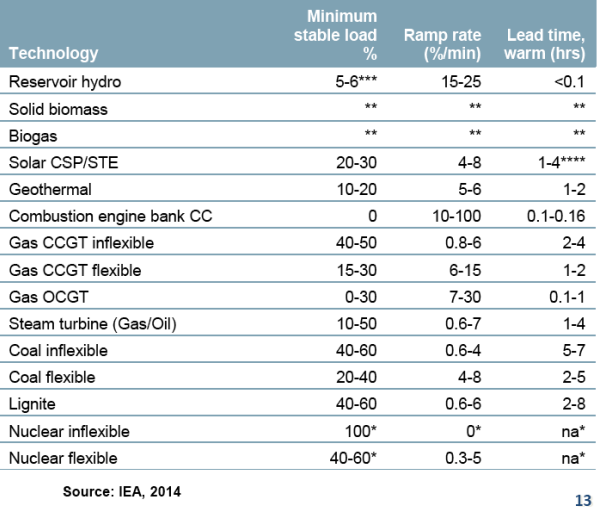

##### Scenario Modelling
1.   Set synchronous generation requirement to 0% and run the model with default settings.
    * For each generation type, calculate the maximum required ramp rate between any two half-hour periods.
    * Are these ramp rates feasible given what we know about each technology's ramp rate?
2.   Run the same analysis under scenario 1 for the 2020 ISP's Central and Step Change Scenarios.


#### Group 4 - Contracts. 

*Useful references*

* [This explainer from the AEMC](https://www.aemc.gov.au/energy-system/electricity/electricity-market/spot-and-contract-markets) explains how the spot and contract markets operate and interact and provides an overview of the main types of contracts.
* [This report from the Renewable Energy Hub](https://arena.gov.au/assets/2020/09/renewable-energy-hub-lessons-learned-report-2.pdf), an ARENA funded organisation, will give you an idea of new types of contracts that are being launched to reflect new needs.
* For the second point you need to cover in your presentation, you could refer to some of the policies listed under Group 2's references.

In your presentation:

* *Briefly* explain what the contract market in the NEM is and why generators and retailers sell and/or buy contracts.
* Explain how contracts may be used to help deploy renewable energy. Provide 2 examples of such contracts and explain how they work.
* Run the scenarios below. Walk the class through your calculations and answers from each of the steps and questions below. Provide charts as necessary. 
* How might renewable energy bid differently in the spot market if they have negotiated contracts (e.g. PPAs, swaps, etc.)?

##### Scenario Modelling

Contracts are based on the spot price but *settled* "on the side". So, for each of the contracts below, calculate the spot market revenue for the generator and then calculate revenue and/or losses from the contract. Then compare revenue from being a merchant generator (i.e. spot market income and no contracts) vs. being contracted (i.e. spot market + revenue/losses from contract). Remember to check units (dispatch intervals are 30 minutes but bids and prices are per hour).
1.   Set synchronous generation requirement to 0% and run the model with default settings.
    * Calculate the impact on the coal generator if it were to sell a baseload swap contract that covers 50% of its capacity (i.e. 2000 MW) at a strike price of $80/MWh. Baseload means all times of every day (i.e. 24/7) and swap means the coal generator is paid or pays the difference between the strike price and spot price to the buyer of the contract (e.g. retailer), similar to a contract for difference (CfD) under a PPA. Explain your results and why a coal generator might choose to do this.
    *  Discuss whether $80/MWh is a reasonable strike price. That is, if the price were higher or lower, how would that affect profit, revenue sufficiency and the coal generator's ability to find a buyer for the swap.
2.   Now model the 2020 ISP's Central Scenario and Step Change scenarios.
    * For each of these scenarios, work out a swap strike price that would result in the generator/seller breaking even (i.e. a strike price higher than this price will yield a profit from the contract). Does it increase or decrease with more renewables?
    * With more renewables is a baseload swap contract attractive to both a seller and buyer? Why/why not? What disadvantages/adavntages might a [solar 'shape' contract](https://www.phillipriley.com.au/tfs-greens-firm-solar-contract-to-help-drive-corporate-demand-for-massive-solar-farms/), which is a type of swap that reflects when and how much solar is generating, have compared to a baseload swap?
